In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [2]:
df = pd.read_csv('Worldcd.csv')
df

,Video Name,Video Description,Video Likes,Name,Comment,Time,Likes,Reply Count
0,ICC Mens Cricket World Cup Trophy Tour 2023 la...,The ICC Mens Cricket World Cup Trophy Tour 202...,101298,M Talha,Salaam,8/20/2023,0,0
1,ICC Mens Cricket World Cup Trophy Tour 2023 la...,The ICC Mens Cricket World Cup Trophy Tour 202...,101298,Keshan Fonseka,Sri lanka is winning the World Cup Laugh at me...,8/20/2023,0,0
2,ICC Mens Cricket World Cup Trophy Tour 2023 la...,The ICC Mens Cricket World Cup Trophy Tour 202...,101298,C U Tube,Unique Cricket Recordsbra hrefhttpsyoutubeUuBG...,8/19/2023,0,0
3,ICC Mens Cricket World Cup Trophy Tour 2023 la...,The ICC Mens Cricket World Cup Trophy Tour 202...,101298,RISING STARS IN GAMING,ICC CRICKET WORLD CUP 2023brIndia HostsbrVisi...,8/18/2023,2,1
4,ICC Mens Cricket World Cup Trophy Tour 2023 la...,The ICC Mens Cricket World Cup Trophy Tour 202...,101298,Md Fahim,Crckit is the best game in the world,8/18/2023,0,0
...,...,...,...,...,...,...,...,...
21025,Official CWC23 Film It Takes One Day,History will be written and dreams will be rea...,81602,Humza Saleem,Nice,7/20/2023,0,0
21026,Official CWC23 Film It Takes One Day,History will be written and dreams will be rea...,81602,Mousam Ali,Srk,7/20/2023,0,0
21027,Official CWC23 Film It Takes One Day,History will be written and dreams will be rea...,81602,Edits__by__Saad,1st view,7/20/2023,0,0
21028,Official CWC23 Film It Takes One Day,History will be written and dreams will be rea...,81602,Subeesh,1st,7/20/2023,0,0


In [3]:
data = df.Comment.values.tolist()
data

['Salaam',
 'Sri lanka is winning the World Cup Laugh at me now but I39ll laugh at you after the final',
 'Unique Cricket Recordsbra hrefhttpsyoutubeUuBGyYmZRe0siRc5hc1pM2z4hi87YhttpsyoutubeUuBGyYmZRe0siRc5hc1pM2z4hi87Ya',
 'ICC CRICKET WORLD CUP 2023brIndia  HostsbrVisiting Teams brAustraliabrEnglandbrNew ZealandbrSouth AfricabrPakistanbrBangladeshbrAfghanistanbrSri LankabrNetherlandsbr4 Prediction  Australia New Zealand India PakistanbrFinal  India vs Pakistan brChampions  brLike  India Comment  Pakistan',
 'Crckit is the best game in the world',
 'India already launch chaandrayaan 3 brto space for moon and to get trophy both',
 'Kemon acho brSee u at Narendra Modi Stadium',
 'West indies not in world cup 2023 ',
 'inshallah Pakistan will win ',
 'Exactly 0  interest in this event outside the sub continent',
 'India won 2023 world cup',
 'pakistan zindabad ji',
 'kemon acho bangladesh',
 'Bangladesh ',
 'Bangladesh win this world Cup inshallah',
 'Remove the pic of those kids from yo

## Data Cleaning 
#### Removing the emails adresses
Replace :****
\S*@\S*\s?
by ''

Demo here

Some explanations :
\S* : match as many non-space characters you can
@ : then a @
\S* : then another sequence of non-space characters
\s? : And eventually a space, if there is one. Note that the '?' is needed to match an address at the end of the line. Because of the greediness of '?', if there is a space, it will always be matched.

﻿

In [4]:
# Remove Emails
import re
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
data

['Salaam',
 'Sri lanka is winning the World Cup Laugh at me now but I39ll laugh at you after the final',
 'Unique Cricket Recordsbra hrefhttpsyoutubeUuBGyYmZRe0siRc5hc1pM2z4hi87YhttpsyoutubeUuBGyYmZRe0siRc5hc1pM2z4hi87Ya',
 'ICC CRICKET WORLD CUP 2023brIndia  HostsbrVisiting Teams brAustraliabrEnglandbrNew ZealandbrSouth AfricabrPakistanbrBangladeshbrAfghanistanbrSri LankabrNetherlandsbr4 Prediction  Australia New Zealand India PakistanbrFinal  India vs Pakistan brChampions  brLike  India Comment  Pakistan',
 'Crckit is the best game in the world',
 'India already launch chaandrayaan 3 brto space for moon and to get trophy both',
 'Kemon acho brSee u at Narendra Modi Stadium',
 'West indies not in world cup 2023 ',
 'inshallah Pakistan will win ',
 'Exactly 0  interest in this event outside the sub continent',
 'India won 2023 world cup',
 'pakistan zindabad ji',
 'kemon acho bangladesh',
 'Bangladesh ',
 'Bangladesh win this world Cup inshallah',
 'Remove the pic of those kids from yo

In [5]:

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
data[0]

'Salaam'

In [6]:
data = pd.Series(data)

In [7]:
# lets do some preproc3essing and move on 
# here we are going to use regex for data cleaning

data_processed = data.apply(lambda x: re.sub(r'[^a-zA-Z/s]+',' ',x).lower())
data_processed

0                                                   salaam
1        sri lanka is winning the world cup laugh at me...
2        unique cricket recordsbra hrefhttpsyoutubeuubg...
3        icc cricket world cup brindia hostsbrvisiting ...
4                     crckit is the best game in the world
                               ...                        
21025                                                 nice
21026                                                  srk
21027                                              st view
21028                                                   st
21029                                                   st
Length: 21030, dtype: object

In [8]:
import nltk

In [9]:
# now lets deal with stopwords 
# using nltk stopwords 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['promo', 'hrefhttpwwwyoutubecomresultssearch', 're', 'edu', 'use' , ])
len(stop_words)



179

In [10]:
data_processed

0                                                   salaam
1        sri lanka is winning the world cup laugh at me...
2        unique cricket recordsbra hrefhttpsyoutubeuubg...
3        icc cricket world cup brindia hostsbrvisiting ...
4                     crckit is the best game in the world
                               ...                        
21025                                                 nice
21026                                                  srk
21027                                              st view
21028                                                   st
21029                                                   st
Length: 21030, dtype: object

In [11]:
from nltk import word_tokenize

In [12]:
data_final = data_processed.apply(lambda x:' '.join([word for word in word_tokenize(x) if word not in stop_words and len(word) >=2]))

In [13]:
data_final[50]

'nice pic'

In [14]:
len(data_final)

21030

## Lets do some EDa

In [15]:
words_list = []
for sentence in data_final:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)
# freq_dist.keys()

[('promo', 5528),
 ('babar', 4900),
 ('india', 4531),
 ('icc', 4126),
 ('world', 3911),
 ('cup', 3354),
 ('azam', 2956),
 ('cricket', 2091),
 ('pakistan', 1996),
 ('indian', 1683),
 ('odi', 1637),
 ('king', 1567),
 ('team', 1424),
 ('hai', 1294),
 ('without', 1227),
 ('bangladesh', 1028),
 ('video', 1027),
 ('ko', 981),
 ('batsman', 960),
 ('like', 951)]

In [16]:
len(words_list)

168496

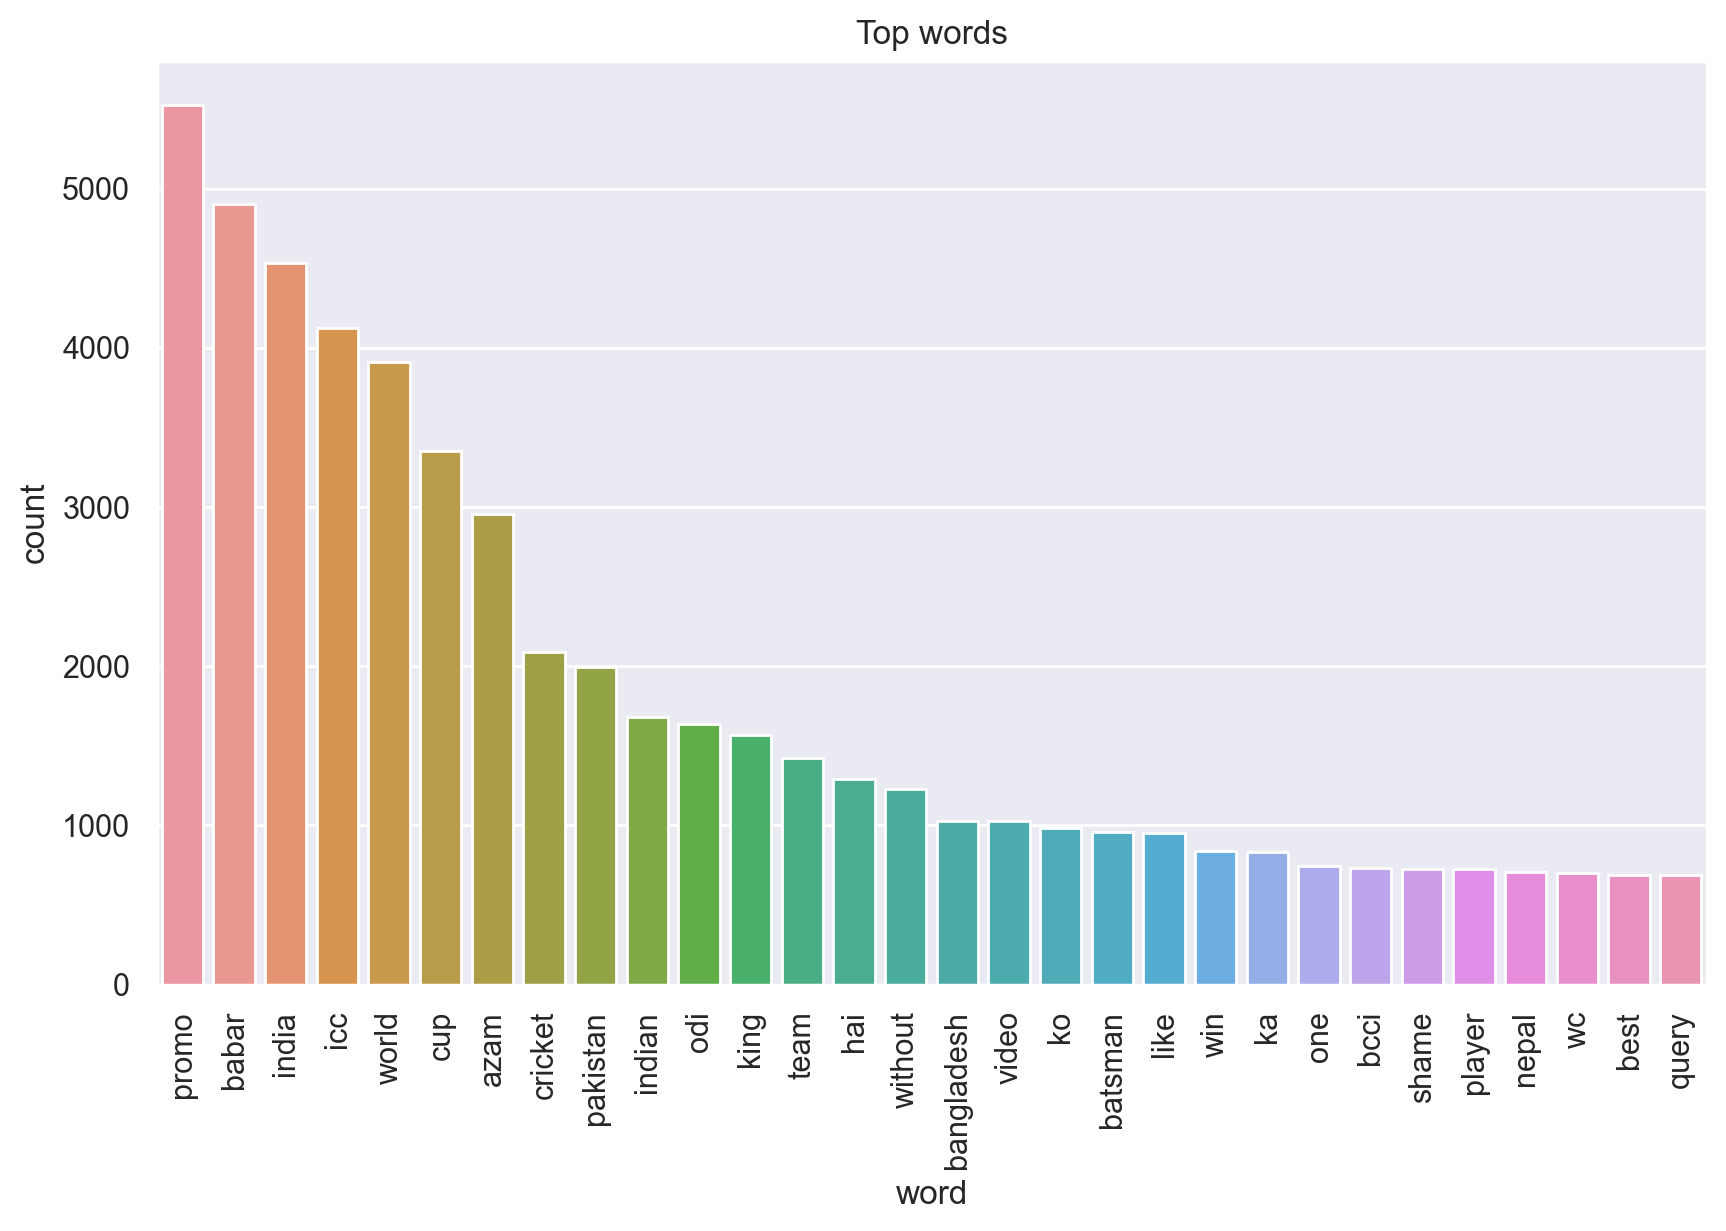

In [17]:
# creating a temporary dataframe and plotting the graph
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

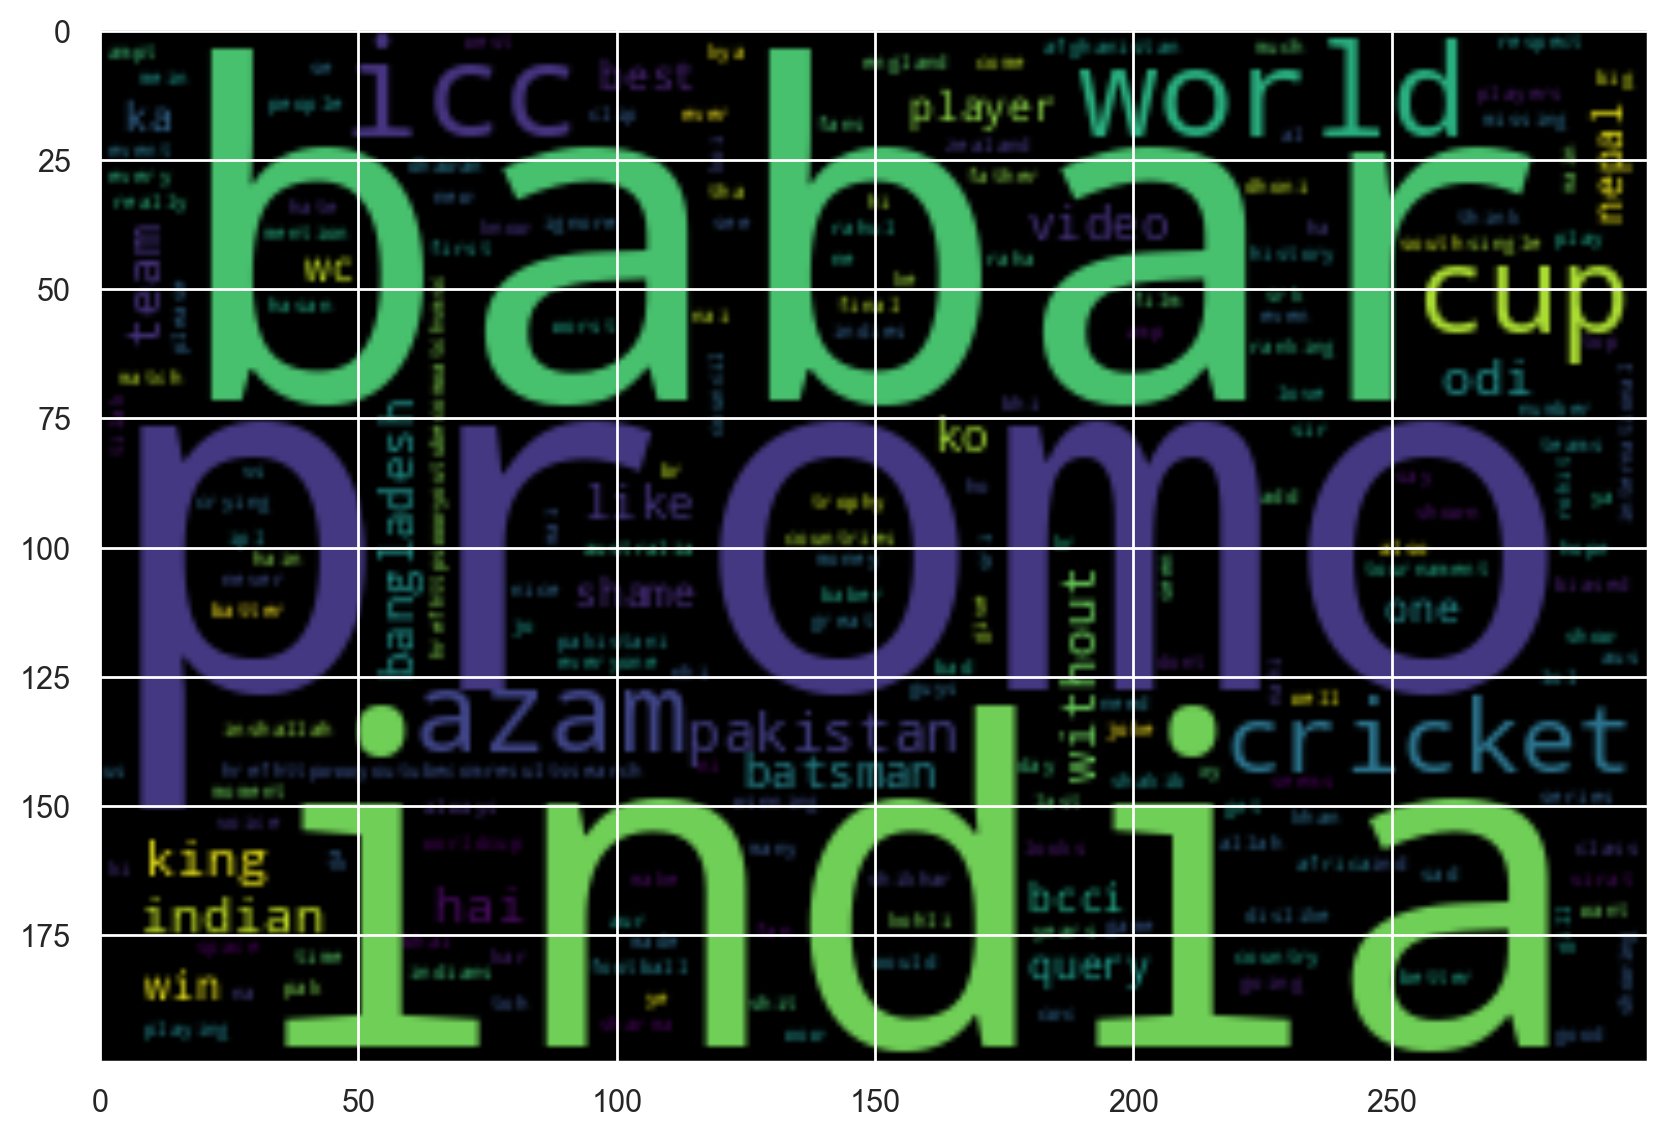

In [18]:
%config InlineBackend.figure_format = 'retina'

from wordcloud import WordCloud
import wordcloud
# creation of wordcloud
wcloud_fig = WordCloud( stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=300, height=200).generate_from_frequencies(freq_dist)

# plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

# ## now lets create a Bigram and trigram for more sense

Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.

Some examples in our example are: ‘front_bumper’, ‘oil_leak’, ‘maryland_college_park’ etc.

Gensim’s Phrases model can build and implement the bigrams, trigrams, quadgrams and more. The two important arguments to Phrases are min_count and threshold. The higher the values of these param, the harder it is for words to be combined to bigrams.


In [19]:
#loading libraries 
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models


In [20]:
data_final

0                                                   salaam
1            sri lanka winning world cup laugh laugh final
2        unique cricket recordsbra hrefhttpsyoutubeuubg...
3        icc cricket world cup brindia hostsbrvisiting ...
4                                   crckit best game world
                               ...                        
21025                                                 nice
21026                                                  srk
21027                                              st view
21028                                                   st
21029                                                   st
Length: 21030, dtype: object

In [21]:
words_sent = [x.split() for x in data_final]
words_sent
bigram = Phrases(words_sent, min_count=5, threshold=100)
trigram = Phrases(bigram[words_sent], threshold=100)  

bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

# bow = [bigram_phraser[word] for word in words_sent] # creating bigram
bow = [trigram_phraser[bigram_phraser[word]] for word in words_sent] # creating trigram and bigrambb 

In [22]:
words_sent

[['salaam'],
 ['sri', 'lanka', 'winning', 'world', 'cup', 'laugh', 'laugh', 'final'],
 ['unique',
  'cricket',
  'recordsbra',
  'hrefhttpsyoutubeuubgyymzre',
  'sirc',
  'hc',
  'pm',
  'hi',
  'yhttpsyoutubeuubgyymzre',
  'sirc',
  'hc',
  'pm',
  'hi',
  'ya'],
 ['icc',
  'cricket',
  'world',
  'cup',
  'brindia',
  'hostsbrvisiting',
  'teams',
  'braustraliabrenglandbrnew',
  'zealandbrsouth',
  'africabrpakistanbrbangladeshbrafghanistanbrsri',
  'lankabrnetherlandsbr',
  'prediction',
  'australia',
  'new',
  'zealand',
  'india',
  'pakistanbrfinal',
  'india',
  'vs',
  'pakistan',
  'brchampions',
  'brlike',
  'india',
  'comment',
  'pakistan'],
 ['crckit', 'best', 'game', 'world'],
 ['india',
  'already',
  'launch',
  'chaandrayaan',
  'brto',
  'space',
  'moon',
  'get',
  'trophy'],
 ['kemon', 'acho', 'brsee', 'narendra', 'modi', 'stadium'],
 ['west', 'indies', 'world', 'cup'],
 ['inshallah', 'pakistan', 'win'],
 ['exactly', 'interest', 'event', 'outside', 'sub', 'con

In [23]:
bow[0:1]

[['salaam']]

In [24]:
### lemmatisation by using spacy and pos tagging
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # disabing the parse and ner from pipeline it increase speed of pipeline

# here 'en' in spacy pipeline means the small version of language

In [25]:
doc = nlp(' '.join(bow[0]))
for token in doc:
    print(token ,'=>', token.pos_)

salaam => PROPN


In [26]:
# now lemmatising the whole corpus so that we can reach to the root words 
def lemmatization(texts, tags=['NOUN', 'ADJ', 'VERB', 'ADV','PROPN']): # filter noun and adjective
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in tags])
    return texts_out

In [27]:
bag_of_words = lemmatization(bow)


In [28]:
bag_of_words[0]

['salaam']

## now we need to encode the whole corpus into some numbers 
The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.

In [29]:
from gensim import corpora
id2word = corpora.Dictionary(bag_of_words)
print(id2word)
# here keys are some numbers and values are our words

Dictionary<17372 unique tokens: ['salaam', 'cup', 'final', 'laugh', 'sri_lanka']...>


In [30]:
#  now lets create a encoded bag of words 
corpus_matrix = [id2word.doc2bow(sent) for sent in bag_of_words]

In [31]:
corpus_matrix[0]

[(0, 1)]

In [32]:
### Now create our model by using gensim lda

In [33]:
# Creating the object for LDA model using gensim library
import gensim

LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=corpus_matrix,id2word=id2word,
                                    num_topics=20, 
                                    random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True)

In [34]:

lda_model.print_topics()
# doc_lda = lda_model[corpus_matrix]

[(0,
  '0.244*"see" + 0.236*"goosebump" + 0.035*"many" + 0.015*"happen" + 0.008*"stadium" + 0.000*"iconic" + 0.000*"srk" + 0.000*"give" + 0.000*"dhoni" + 0.000*"hrefhttpswwwyoutubecomwatchvmsc_xy"'),
 (1,
  '0.118*"indians" + 0.111*"lift" + 0.097*"ind" + 0.025*"start" + 0.001*"excellent" + 0.000*"pak" + 0.000*"match" + 0.000*"time" + 0.000*"year" + 0.000*"wait"'),
 (2,
  '0.492*"promo" + 0.309*"pakistan" + 0.034*"worldcup" + 0.000*"srk" + 0.000*"voice" + 0.000*"time" + 0.000*"first" + 0.000*"ampt" + 0.000*"ko" + 0.000*"hrefhttpswwwyoutubecomwatchvmsc_xy"'),
 (3,
  '0.146*"comment" + 0.103*"australia" + 0.089*"know" + 0.081*"much" + 0.059*"guy" + 0.024*"keep" + 0.024*"new_zealand" + 0.017*"write" + 0.002*"brindia" + 0.000*"first"'),
 (4,
  '0.315*"world" + 0.264*"cup" + 0.135*"team" + 0.095*"good" + 0.041*"love" + 0.037*"play" + 0.016*"also" + 0.012*"afghanistan" + 0.004*"deserve" + 0.003*"stupid"'),
 (5,
  '0.755*"india" + 0.079*"fan" + 0.000*"srk" + 0.000*"time" + 0.000*"voice" + 0.00

### Visualisation of topic modelling

In [36]:
# !pip install pyldavis

import pyLDAvis
import gensim
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.339381 -0.318629       1        1  15.346167
17     0.153526  0.219309       2        1  14.665473
2      0.099856  0.065806       3        1  11.510384
13     0.103322  0.071180       4        1  10.282626
11     0.115123  0.092412       5        1   8.663000
7      0.111577  0.085588       6        1   8.021391
15     0.074964  0.034584       7        1   7.155703
5      0.098741  0.064155       8        1   6.957241
18     0.019729 -0.004333       9        1   4.852176
19    -0.034228 -0.023503      10        1   2.647305
16    -0.065604 -0.029482      11        1   1.925034
3     -0.096964 -0.031978      12        1   1.735503
12    -0.100979 -0.031969      13        1   1.558264
8     -0.117737 -0.029644      14        1   1.471769
0     -0.097971 -0.031915      15        1   0.975948
9     -0.117600 -0.029656      16        1   0.817246
1     -0.117956 -0.029536      17        1   0.671053
10    -0.121435 -0.027512      18        1   0.531640
14    -0.122872 -0.022438      19        1   0.109829
6     -0.122872 -0.022438      20        1   0.102246, topic_info=            Term         Freq        Total Category  logprob  loglift
24         india  8010.000000  8010.000000  Default  30.0000  30.0000
23           icc  7737.000000  7737.000000  Default  29.0000  29.0000
285        promo  8644.000000  8644.000000  Default  28.0000  28.0000
6          world  7378.000000  7378.000000  Default  27.0000  27.0000
284        babar  6631.000000  6631.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
23           icc     0.008978  7737.185334  Topic20  -9.7626  -6.7813
24         india     0.008978  8010.678466  Topic20  -9.7626  -6.8160
26   new_zealand     0.008978    63.929649  Topic20  -9.7626  -1.9853
27      pakistan     0.008978  5420.693135  Topic20  -9.7626  -6.4255
29    prediction     0.008978     1.652528  Topic20  -9.7626   1.6702

[908 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
320      13  0.983220           ab
321      13  0.942506         abhi
57        7  0.996927          add
72        1  0.993709  afghanistan
92       11  0.949965        allah
...     ...       ...          ...
272       5  0.988292       winner
6         1  0.999813        world
286       3  0.998291     worldcup
79       12  0.959636        write
54       16  0.935437     zindabad

[139 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 18, 3, 14, 12, 8, 16, 6, 19, 20, 17, 4, 13, 9, 1, 10, 2, 11, 15, 7])

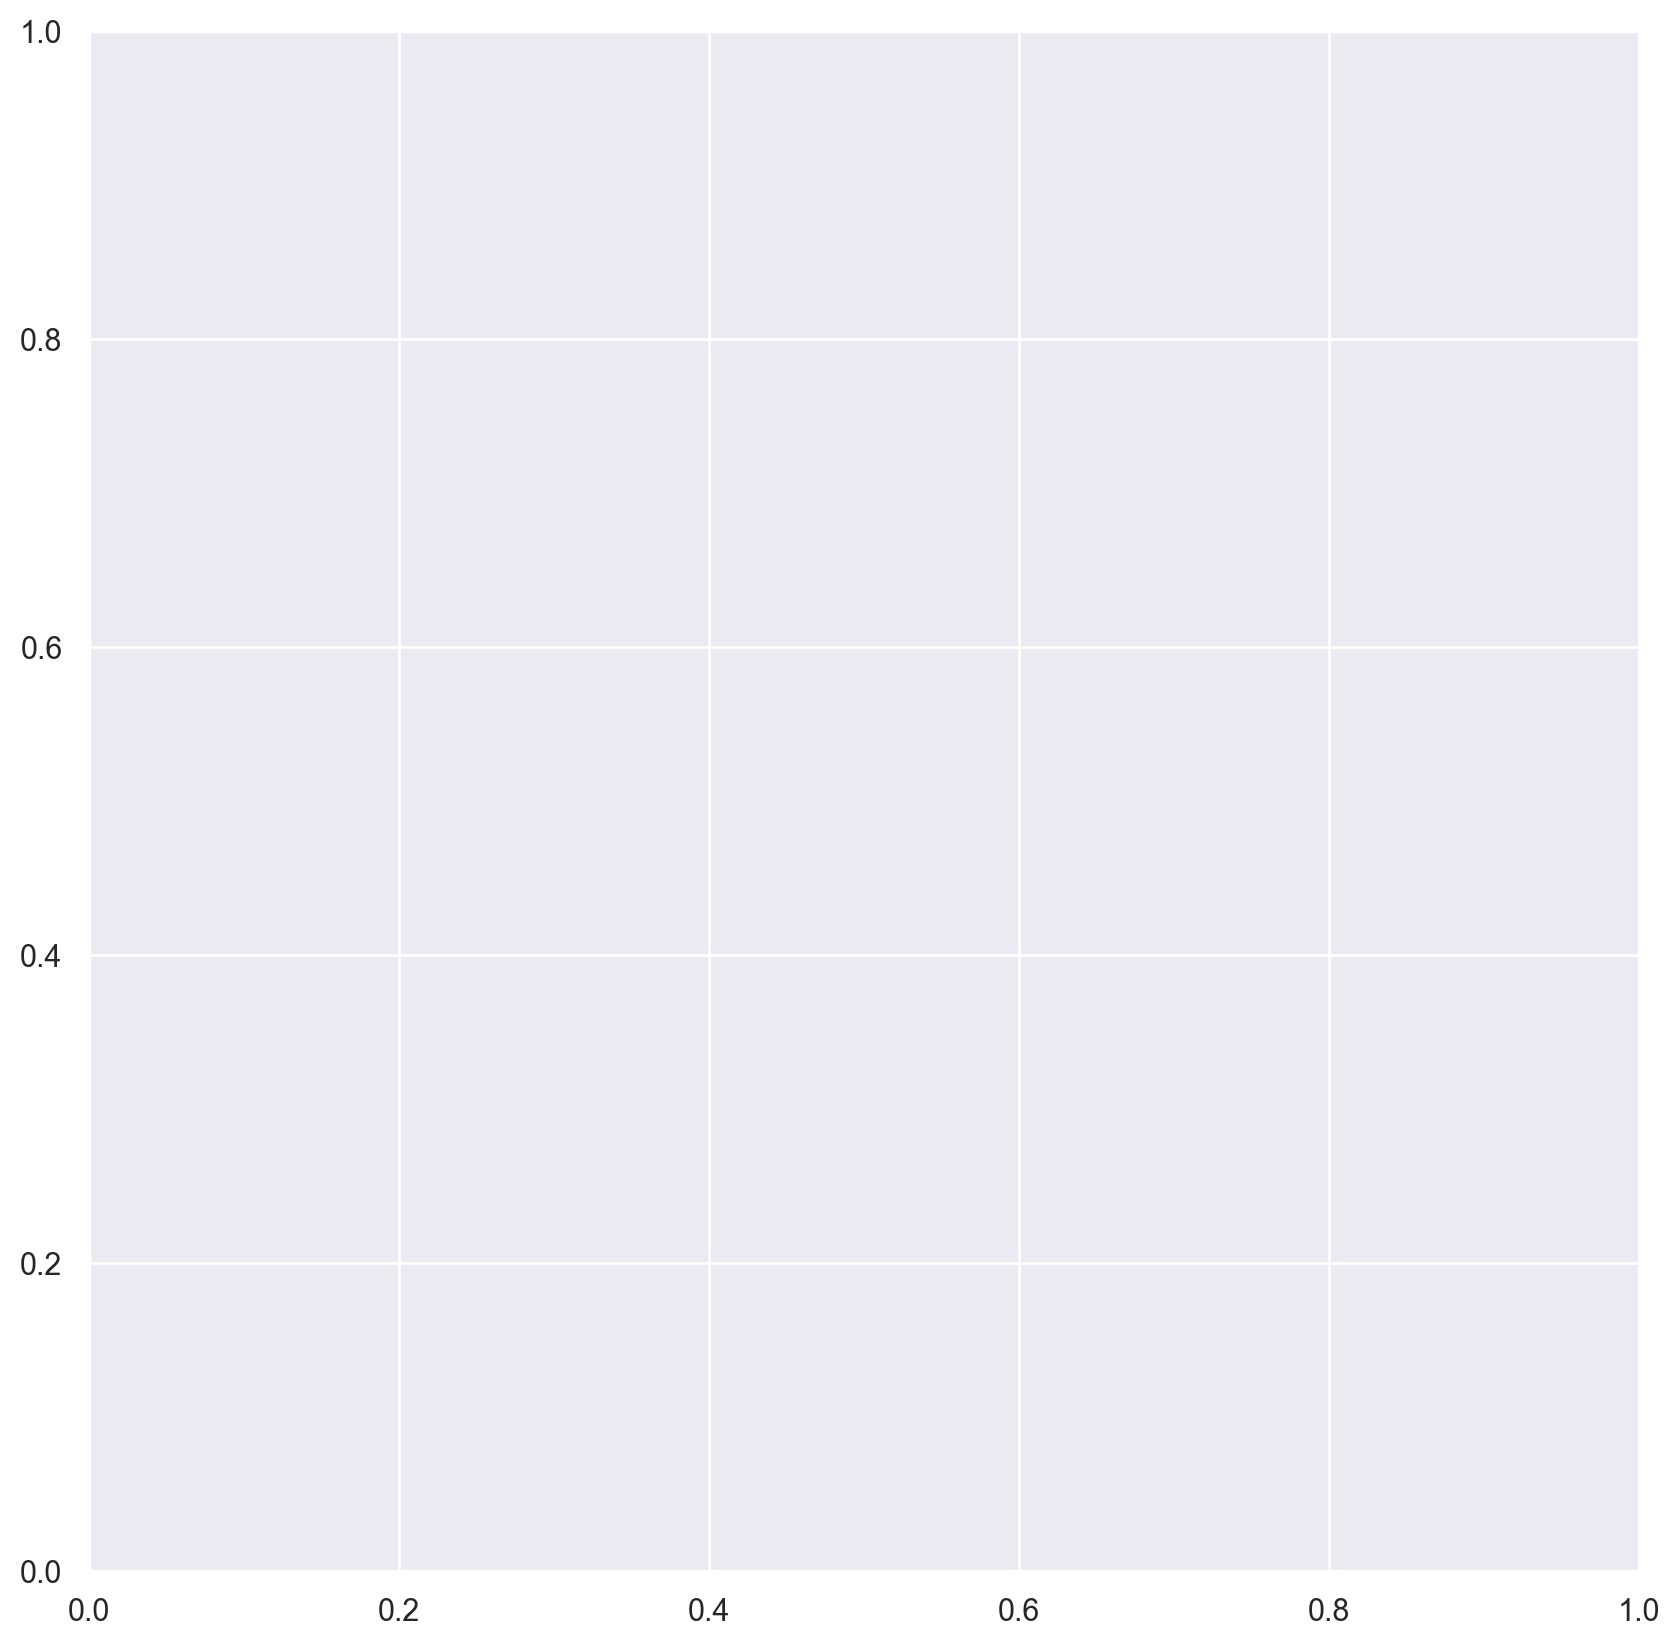

In [37]:
# Visualize the topics

# Visualize the topics
fig, ax = plt.subplots(figsize=(10, 10))
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus = corpus_matrix, dictionary = id2word)
vis

#### Compute Model Perplexity and Coherence Score
Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. In my experience, topic coherence score, in particular, has been

In [38]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_matrix))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=bag_of_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -18.084278396470925

Coherence Score:  0.3128747104790041


### Finding the number of topics 
Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

The compute_coherence_values() (see below) trains multiple LDA models and provides the models and their corresponding coherence scores.

In [39]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LDA(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [40]:
# it can take time so be patience
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus_matrix, texts=bag_of_words, start=18, limit=40, step=6)


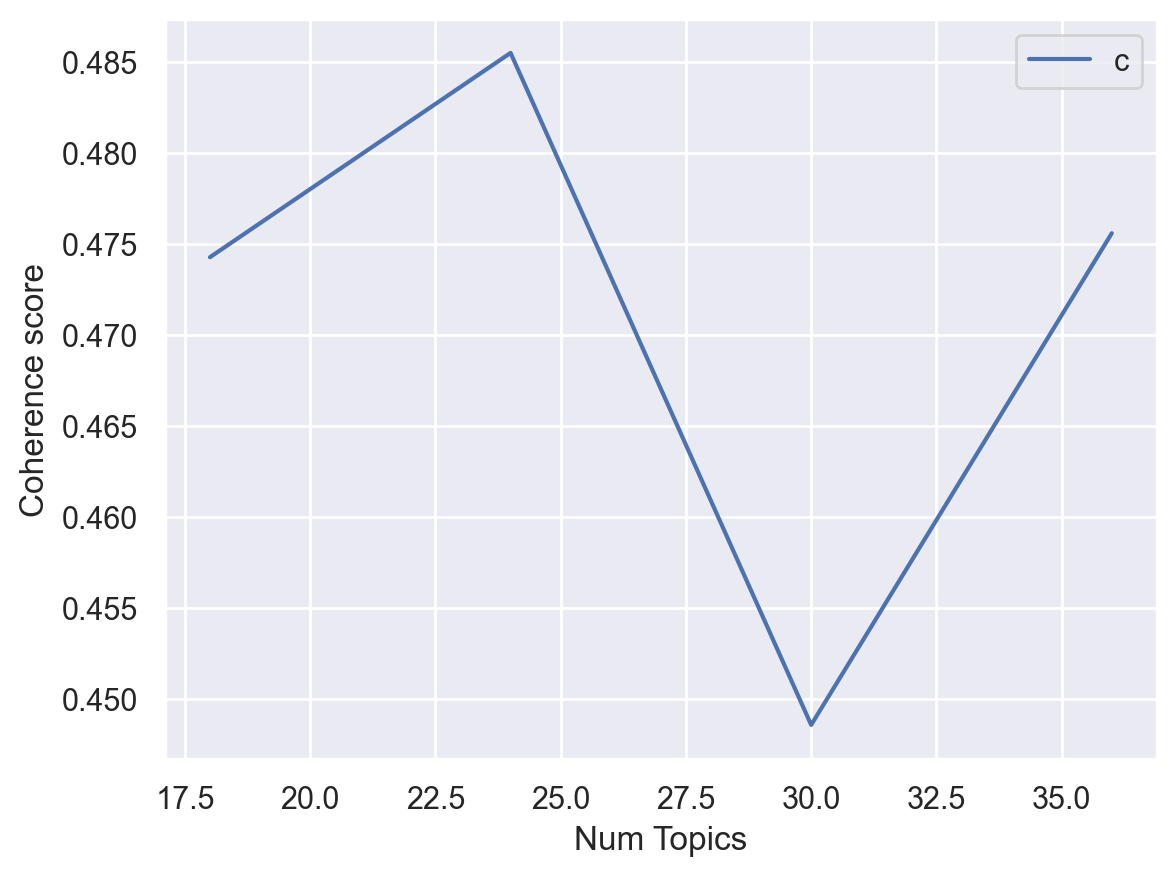

In [41]:
# Show graph
limit=40; start=18; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#### from here we have got the best 30 topics to be selected in our data 

In [42]:
# Creating the object for LDA model using gensim library
import gensim
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=corpus_matrix,id2word=id2word,
                                    num_topics=23, 
                                    random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True)

In [43]:
lda_model.print_topics()


[(16,
  '0.000*"buttongtgtgtgtgt" + 0.000*"zabardasti" + 0.000*"thumb" + 0.000*"sportbrin" + 0.000*"everbricc" + 0.000*"azambrthey" + 0.000*"jay_shah" + 0.000*"ccricket" + 0.000*"kartay" + 0.000*"alert"'),
 (10,
  '0.040*"zindabad" + 0.025*"ji" + 0.000*"madam" + 0.000*"de" + 0.000*"come" + 0.000*"jiyege" + 0.000*"crown" + 0.000*"different" + 0.000*"hum" + 0.000*"le"'),
 (22,
  '0.166*"final" + 0.067*"highlight" + 0.000*"dhoni" + 0.000*"upload" + 0.000*"even" + 0.000*"confirm" + 0.000*"srk" + 0.000*"come" + 0.000*"cwc" + 0.000*"youtube"'),
 (9,
  '0.162*"hi" + 0.060*"sri_lanka" + 0.000*"ko" + 0.000*"film" + 0.000*"ye" + 0.000*"tha" + 0.000*"nhi" + 0.000*"baki" + 0.000*"bcz" + 0.000*"hain"'),
 (1,
  '0.378*"love" + 0.000*"srk" + 0.000*"voice" + 0.000*"khan" + 0.000*"crickter" + 0.000*"mean" + 0.000*"pakistanis" + 0.000*"representation" + 0.000*"incomplete" + 0.000*"level"'),
 (13,
  '0.231*"pakistani" + 0.152*"baber" + 0.069*"west_indie" + 0.009*"use" + 0.000*"shame" + 0.000*"even" + 0.0

In [44]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_matrix))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=bag_of_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -19.721611538238804

Coherence Score:  0.33980131933294694
